In [283]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model  import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [284]:
customer_churn_data = pd.read_csv('/content/Churn_Modelling.csv')

In [285]:
# First five rows of Dataset
customer_churn_data.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [286]:
# Last five rows of Dataset
customer_churn_data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [287]:
# Number of Rows and Number of columns
customer_churn_data.shape

(10000, 14)

In [288]:
print('Number of Rows', customer_churn_data.shape[0])
print('Number of columns', customer_churn_data.shape[1])

Number of Rows 10000
Number of columns 14


In [289]:
# Dataset Infomation
customer_churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [290]:
# Checking the number of Missing Values in each Column
customer_churn_data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [291]:
# Get Overall Statistics About the Dataset
customer_churn_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [292]:
customer_churn_data.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


Dropping Irrelevant Features

In [293]:
customer_churn_data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [294]:
customer_churn_data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [295]:
customer_churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Encoding the Dataset

In [296]:
customer_churn_data['Geography'].unique()


array(['France', 'Spain', 'Germany'], dtype=object)

In [297]:
customer_churn_data = pd.get_dummies(customer_churn_data, drop_first=True)

In [298]:
customer_churn_data.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Surname_Zotova,Surname_Zox,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,...,0,0,0,0,0,0,0,0,0,0
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,...,0,0,0,0,0,0,0,0,1,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,...,0,0,0,0,0,0,0,0,0,0
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,...,0,0,0,0,0,0,0,0,0,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,...,0,0,0,0,0,0,0,0,1,0


Not Handling Imbalance

In [299]:
customer_churn_data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<Axes: ylabel='count'>

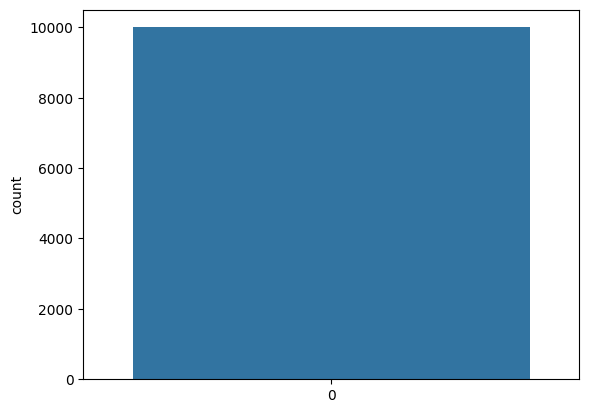

In [300]:
sns.countplot(customer_churn_data['Exited'])

In [301]:
X = customer_churn_data.drop('Exited', axis=1)
Y = customer_churn_data['Exited']

In [302]:
print(X)


      RowNumber  CustomerId  CreditScore  Age  Tenure    Balance  \
0             1    15634602          619   42       2       0.00   
1             2    15647311          608   41       1   83807.86   
2             3    15619304          502   42       8  159660.80   
3             4    15701354          699   39       1       0.00   
4             5    15737888          850   43       2  125510.82   
...         ...         ...          ...  ...     ...        ...   
9995       9996    15606229          771   39       5       0.00   
9996       9997    15569892          516   35      10   57369.61   
9997       9998    15584532          709   36       7       0.00   
9998       9999    15682355          772   42       3   75075.31   
9999      10000    15628319          792   28       4  130142.79   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  ...  \
0                 1          1               1        101348.88  ...   
1                 1          0         

In [303]:
print(Y)


0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64


Split the data intto Training data and Testing data

In [304]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, stratify=Y, random_state=42 )

Feature Scaling

In [305]:
sc = StandardScaler()

In [306]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [307]:
print(X_train)

[[-0.98001989 -1.42167772  1.058568   ... -0.57831252 -0.57773517
   0.90750738]
 [ 1.17479736 -0.69120691  0.91362605 ...  1.72916886 -0.57773517
   0.90750738]
 [ 0.0057201   0.82211776  1.07927399 ...  1.72916886 -0.57773517
  -1.10191942]
 ...
 [ 1.36469473  0.26278153  0.16821031 ... -0.57831252 -0.57773517
  -1.10191942]
 [-0.70932982 -0.02019528  0.37527024 ... -0.57831252  1.73089688
   0.90750738]
 [ 0.42004163  1.18510103  1.56586482 ... -0.57831252  1.73089688
   0.90750738]]


In [308]:
print(X_test)

[[ 0.23253528  0.81111224 -0.66718803 ... -0.58042949 -0.55809982
   0.93228691]
 [-0.48203249  1.61460828 -1.28654133 ...  1.72286214 -0.55809982
   0.93228691]
 [-1.20186735  1.52733582 -0.95621957 ... -0.58042949  1.79179416
  -1.07263117]
 ...
 [ 1.64306045  0.46053496 -1.37944433 ...  1.72286214 -0.55809982
  -1.07263117]
 [-0.7948973  -0.08456343  0.4063577  ... -0.58042949 -0.55809982
   0.93228691]
 [-0.44375835 -0.5417916   1.03603357 ... -0.58042949 -0.55809982
   0.93228691]]


**1.Logistic Regression**

In [309]:
log = LogisticRegression()

In [310]:
log.fit(X_train, Y_train)

LogisticRegression()

In [311]:
L_prediction = log.predict(X_test)

In [312]:
accuracy_score(Y_test, L_prediction)

0.782

In [313]:
precision_score(Y_test, L_prediction)

0.40397350993377484

In [314]:
recall_score(Y_test, L_prediction)

0.14987714987714987

In [315]:
f1_score(Y_test, L_prediction)

0.2186379928315412

**2.Svm**

In [316]:
svm = svm.SVC()

In [317]:
svm.fit(X_train, Y_train)

SVC()

In [318]:
S_prediction = svm.predict(X_test)

In [319]:
accuracy_score(Y_test,S_prediction)

0.7945

In [320]:
precision_score(Y_test, S_prediction)

0.3333333333333333

**3.KNeighbors Classifier**

In [321]:
knn = KNeighborsClassifier()

In [322]:
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [323]:
K_prediction = knn.predict(X_test)

In [324]:
accuracy_score(Y_test, K_prediction)

0.78

In [325]:
precision_score(Y_test, K_prediction)

0.17647058823529413

**4.Decision Tree Classifier**

In [326]:
dt = DecisionTreeClassifier()

In [327]:
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [328]:
D_prediction = dt.predict(X_test)

In [329]:
accuracy_score(Y_test, D_prediction)

0.8245

In [330]:
precision_score(Y_test, D_prediction)

0.5790960451977402

**5.Random Forest Classifier**

In [331]:
rf = RandomForestClassifier()

In [332]:
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [333]:
R_prediction = rf.predict(X_test)

In [334]:
accuracy_score(Y_test, R_prediction)

0.8565

In [335]:
precision_score(Y_test, R_prediction)

0.875

**6.Gradient Boosting Classifier**

In [336]:
gbc = GradientBoostingClassifier()

In [337]:
gbc.fit(X_train, Y_train)

GradientBoostingClassifier()

In [338]:
G_prediction = gbc.predict(X_test)

In [339]:
accuracy_score(Y_test, G_prediction)

0.8655

In [340]:
precision_score(Y_test, G_prediction)

0.7875

In [341]:
final_data = pd.DataFrame({'Models': ['LR','SVC','KNN','DT','RF','GBC'], 'ACC': [ accuracy_score(Y_test,L_prediction),
                                                                                 accuracy_score(Y_test,S_prediction),
                                                                                 accuracy_score(Y_test,K_prediction),
                                                                                 accuracy_score(Y_test,D_prediction),
                                                                                 accuracy_score(Y_test,R_prediction),
                                                                                 accuracy_score(Y_test,G_prediction)]})

In [342]:
final_data

,Models,ACC
0,LR,0.7820
1,SVC,0.7945
2,KNN,0.7800
3,DT,0.8245
4,RF,0.8565
5,GBC,0.8655
